# **Data analysis to extract insights into the dataset.**



Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5152 entries, 0 to 5151
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   functional group  5152 non-null   object 
 1   A                 5152 non-null   object 
 2   A_OS              5152 non-null   int64  
 3   A'                5152 non-null   object 
 4   A'_OS             5152 non-null   int64  
 5   A_HOMO-           5152 non-null   float64
 6   A_HOMO+           5152 non-null   float64
 7   A_IE-             5152 non-null   float64
 8   A_IE+             5152 non-null   float64
 9   A_LUMO-           5152 non-null   float64
 10  A_LUMO+           5152 non-null   float64
 11  A_X-              5152 non-null   float64
 12  A_X+              5152 non-null   float64
 13  A_Z_radii-        5152 non-null   float64
 14  A_Z_radii+        5152 non-null   float64
 15  A_e_affin-        5152 non-null   float64
 16  A_e_affin+        5152

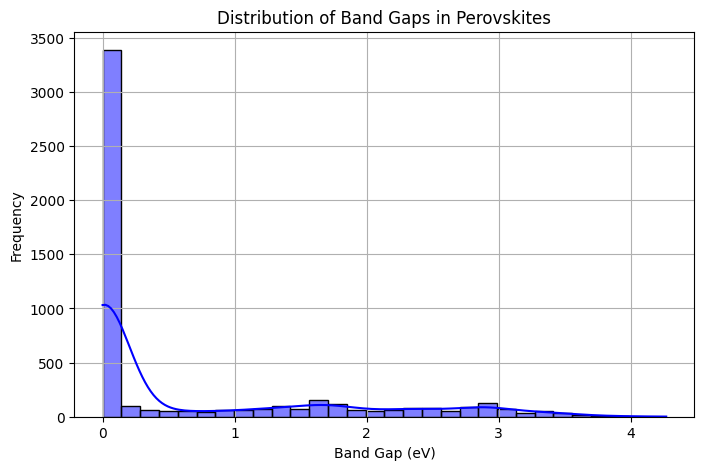

<ipython-input-7-1ad8629a01ee>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['is_insulator'], palette=["red", "green"])


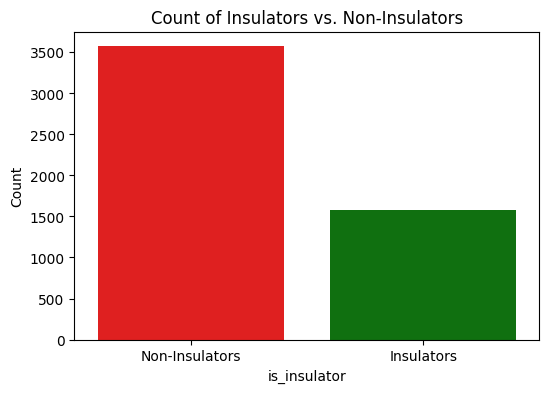

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 119861 (\N{MATHEMATICAL ITALIC CAPITAL B}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 119861 (\N{MATHEMATICAL ITALIC CAPITAL B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


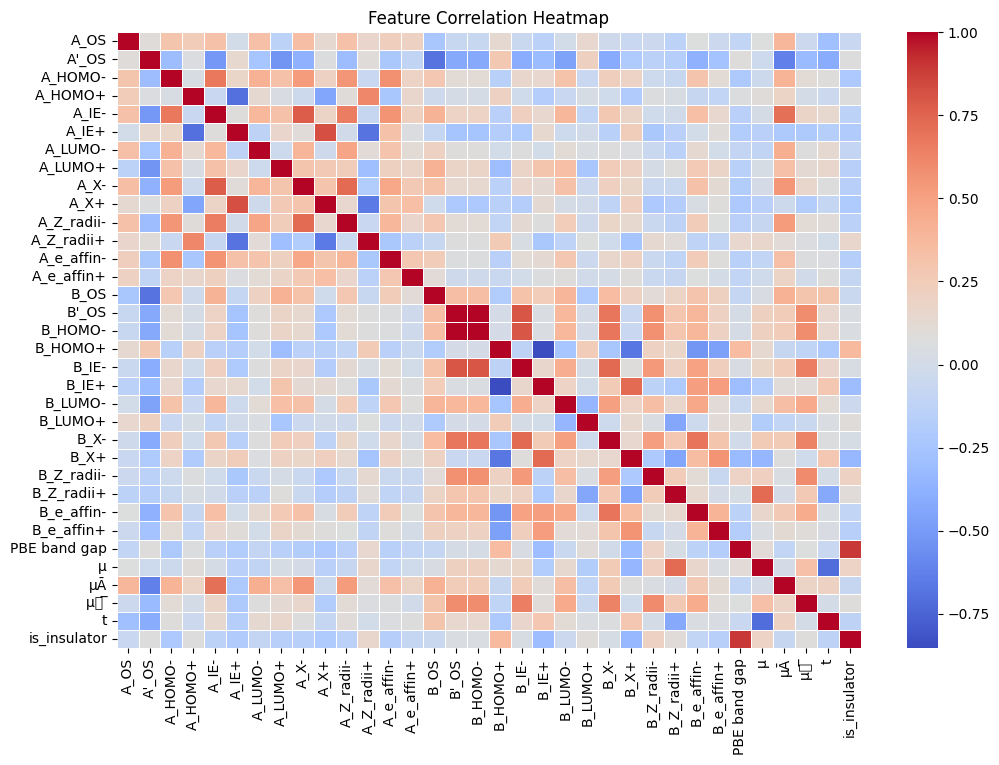


🔹 Top Features Correlated with Band Gap:
is_insulator    0.897517
B_HOMO+         0.362133
B_Z_radii-      0.194042
A_Z_radii+      0.148116
μ               0.102867
B_LUMO+         0.101858
A'_OS           0.081044
μ𝐵 ̅            0.068278
A_HOMO+         0.060722
B_IE-           0.040860
Name: PBE band gap, dtype: float64


<ipython-input-7-1ad8629a01ee>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_filtered["functional group"], y=df_filtered["PBE band gap"], order=group_order, palette="coolwarm")


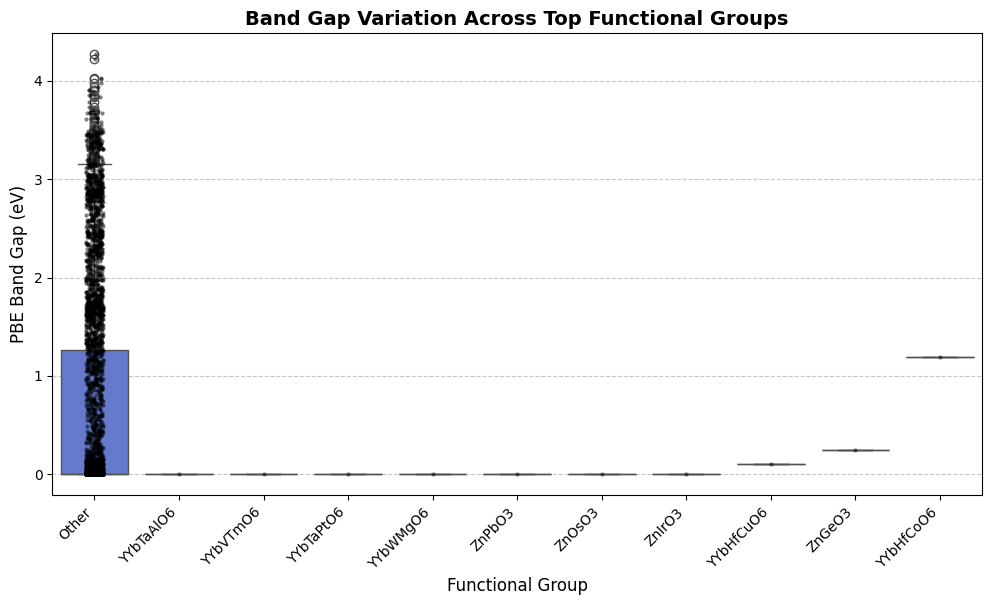

In [7]:
#DATA ANALYSIS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "/content/drive/MyDrive/data_excavate.csv"
df = pd.read_csv(file_path)

df['is_insulator'] = (df['PBE band gap'] >= 0.5).astype(int)

### Summary Statistics
print("\n\nDataset Overview:")
print(df.info())

print("\n\nDescriptive Statistics:")
print(df.describe())

###Band Gap Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['PBE band gap'], bins=30, kde=True, color="blue")
plt.title("Distribution of Band Gaps in Perovskites")
plt.xlabel("Band Gap (eV)")
plt.ylabel("Frequency")
plt.grid()
plt.show()

###Insulators vs. Non-Insulators Count
plt.figure(figsize=(6, 4))
sns.countplot(x=df['is_insulator'], palette=["red", "green"])
plt.title("Count of Insulators vs. Non-Insulators")
plt.xticks(ticks=[0, 1], labels=["Non-Insulators", "Insulators"])
plt.ylabel("Count")
plt.show()

###Correlation Matrix
plt.figure(figsize=(12, 8))
numerical_df = df.select_dtypes(include=np.number)
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

###Top Features Affecting Band Gap
feature_correlation = corr_matrix["PBE band gap"].drop("PBE band gap").sort_values(ascending=False)
print("\n🔹 Top Features Correlated with Band Gap:")
print(feature_correlation.head(10))  # Top 10 features


###plot of Band Gap for Different Functional Groups
top_groups = df["functional group"].value_counts().nlargest(10).index #top 10 features

df_filtered = df.copy()
df_filtered["functional group"] = df_filtered["functional group"].apply(lambda x: x if x in top_groups else "Other")
group_order = df_filtered.groupby("functional group")["PBE band gap"].median().sort_values().index
plt.figure(figsize=(12, 6))

# Boxplot for distribution
sns.boxplot(x=df_filtered["functional group"], y=df_filtered["PBE band gap"], order=group_order, palette="coolwarm")
# Stripplot (instead of swarmplot for speed)
sns.stripplot(x=df_filtered["functional group"], y=df_filtered["PBE band gap"],
              order=group_order, color="black", alpha=0.5, size=3, jitter=True)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("Band Gap Variation Across Top Functional Groups", fontsize=14, fontweight='bold')
plt.ylabel("PBE Band Gap (eV)", fontsize=12)
plt.xlabel("Functional Group", fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()
